# Lab 7.04 - Time series analysis

In [2]:
# Package imports for data science
import numpy as np  # Scientific computing
import scipy.stats as stats  # Statistical tests
import pandas as pd  # Data Frame
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt  # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns  # Advanced data visualisation

C:\Users\nealj\AppData\Local\Temp\ipykernel_20328\2255606428.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd  # Data Frame


### Exercise 4 - Airline ticket data

Consider the airline ticket data in the file airline ticket data.csv  

- Create a time series chart of the data. Based on what you see, which of the exponential smoothing models do you think should be used for forecasting? Why?
- Create and train the model. Predict the values for the next 12 months.
- Create a plot with the airline ticket data, the fitted values and the predicted values for the next 12 months.

In [3]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/airline%20ticket%20data.csv",
    delimiter=";",
    parse_dates=["Month"],
).set_index(["Month"])

data.head()

C:\Users\nealj\AppData\Local\Temp\ipykernel_20328\250468285.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(


,Tickets
Month,
2018-01-01,605
2018-02-01,647
2018-03-01,636
2018-04-01,612
2018-05-01,714


<Axes: xlabel='Month'>

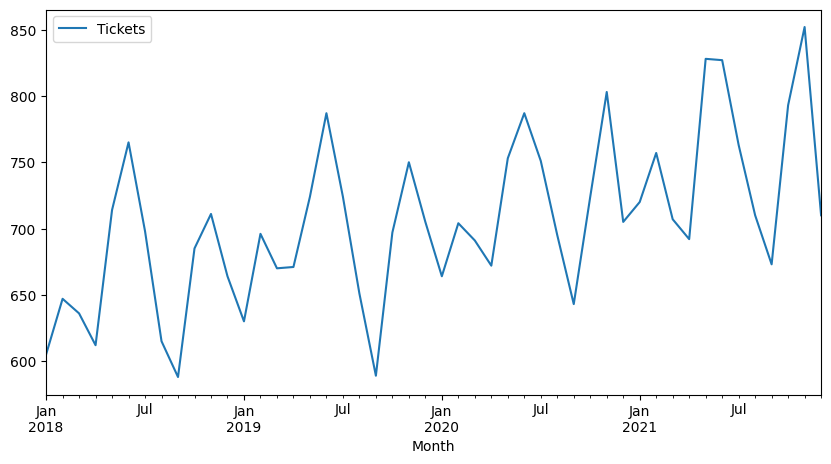

In [5]:
data.plot(y="Tickets", figsize=[10, 5])

Text(0.5, 1.0, 'Train, test, fitted & predicted values using Holt-Winters')

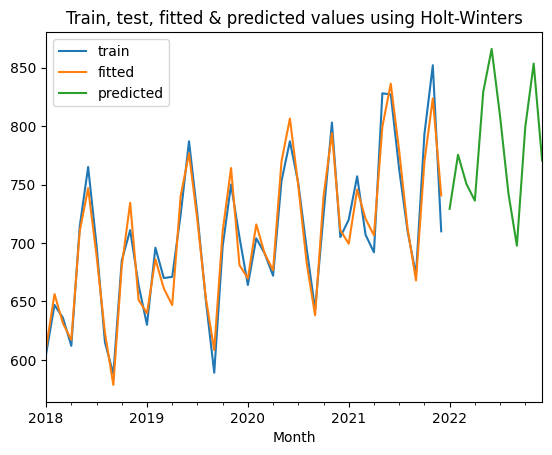

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = data.Tickets

wounded_hw = ExponentialSmoothing(
    train, trend="add", seasonal="add", seasonal_periods=12, freq="MS"
).fit()

train.plot(legend=True, label="train")
(wounded_hw.level + wounded_hw.season).plot(legend=True, label="fitted")

wounded_predicted = wounded_hw.forecast(12)

wounded_predicted.plot(legend=True, label="predicted")

plt.title("Train, test, fitted & predicted values using Holt-Winters")

## Source
Business Analytics Data Analysis & Decision Making 